In [49]:
pip install xgboost==1.5.1

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
import xgboost as xgb
sns.set()


#importation des bibliothèques sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from collections import OrderedDict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

# from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error as MSE
from matplotlib.pyplot import *
import xgboost as XGB
from datetime import datetime

C:\Users\farah\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
#importation des données
Dec  = pd.read_csv('Decembre.csv')
Nov = pd.read_csv('Novembre.csv')
Oct = pd.read_csv('maybe.csv')
Sept = pd.read_csv('maybe2.csv')

In [3]:
Dec = Dec[['tenant', 'ETABLISSEMENT','date', 'GL_TOTALTTC','GL_NUMERO','Sic','CODEISO2','TYPEETAB']]

In [4]:
Dec

,tenant,ETABLISSEMENT,date,GL_TOTALTTC,GL_NUMERO,Sic,CODEISO2,TYPEETAB
0,90001909,001,2021-12-01,1830.526330,60,90001909,FR,SUC
1,90001909,001,2021-12-02,1502.242821,61,90001909,FR,SUC
2,90001909,001,2021-12-03,1497.989600,60,90001909,FR,SUC
3,90001909,001,2021-12-04,3975.179000,149,90001909,FR,SUC
4,90001909,001,2021-12-05,1765.424000,99,90001909,FR,SUC
...,...,...,...,...,...,...,...,...
100382,98684541,7998,2021-12-29,2058.700000,19,98684541,FR,SUC
100383,98684541,7998,2021-12-30,1846.900000,21,98684541,FR,SUC
100384,98684541,7998,2021-12-31,1657.500000,15,98684541,FR,SUC
100385,98684541,8949,2021-12-28,729.340000,5,98684541,FR,ECO


In [5]:
Nov

,Unnamed: 0,tenant,ETABLISSEMENT,date,GL_TOTALTTC,GL_NUMERO,Sic,CODEISO2,TYPEETAB
0,0,90001909,001,2021-11-01,2699.885987,107,90001909,FR,SUC
1,1,90001909,001,2021-11-02,1769.352004,69,90001909,FR,SUC
2,2,90001909,001,2021-11-03,1123.146000,58,90001909,FR,SUC
3,3,90001909,001,2021-11-04,2104.352600,88,90001909,FR,SUC
4,4,90001909,001,2021-11-05,1867.834400,86,90001909,FR,SUC
...,...,...,...,...,...,...,...,...,...
90148,255125,98684541,7998,2021-11-26,3136.100000,28,98684541,FR,SUC
90149,255126,98684541,7998,2021-11-27,2232.600000,17,98684541,FR,SUC
90150,255127,98684541,7998,2021-11-29,2495.800000,19,98684541,FR,SUC
90151,255128,98684541,7998,2021-11-30,692.000000,6,98684541,FR,SUC


In [6]:
Oct

,Unnamed: 0,tenant,ETABLISSEMENT,date,GL_TOTALTTC,GL_NUMERO,Sic,CODEISO2,TYPEETAB
0,0,90001909,001,2021-10-06,1456.542004,77,90001909,FR,SUC
1,1,90001909,001,2021-10-07,1452.254000,69,90001909,FR,SUC
2,2,90001909,001,2021-10-08,1445.655200,65,90001909,FR,SUC
3,3,90001909,001,2021-10-09,2081.562400,117,90001909,FR,SUC
4,4,90001909,001,2021-10-11,2032.720000,95,90001909,FR,SUC
...,...,...,...,...,...,...,...,...,...
89360,140339,98684541,7998,2021-10-26,1679.000000,13,98684541,FR,SUC
89361,140340,98684541,7998,2021-10-27,1254.300000,11,98684541,FR,SUC
89362,140341,98684541,7998,2021-10-28,1205.400000,9,98684541,FR,SUC
89363,140342,98684541,7998,2021-10-29,2134.500000,22,98684541,FR,SUC


In [7]:
Sept

,Unnamed: 0,tenant,ETABLISSEMENT,date,GL_TOTALTTC,GL_NUMERO,Sic,CODEISO2,TYPEETAB
0,0,90001909,001,2021-09-01,3511.7220,141,90001909,FR,SUC
1,1,90001909,001,2021-09-02,2230.7736,110,90001909,FR,SUC
2,2,90001909,001,2021-09-03,2635.2680,124,90001909,FR,SUC
3,3,90001909,001,2021-09-04,1776.3340,85,90001909,FR,SUC
4,4,90001909,001,2021-09-06,703.3888,39,90001909,FR,SUC
...,...,...,...,...,...,...,...,...,...
104223,188015,98684541,7998,2021-09-25,2909.9000,27,98684541,FR,SUC
104224,188016,98684541,7998,2021-09-27,1137.0000,7,98684541,FR,SUC
104225,188017,98684541,7998,2021-09-28,863.0000,7,98684541,FR,SUC
104226,188018,98684541,7998,2021-09-29,1172.0000,9,98684541,FR,SUC


In [8]:
df_total = pd.concat([Sept,Oct,Nov], ignore_index=True)

In [9]:
df_total

,Unnamed: 0,tenant,ETABLISSEMENT,date,GL_TOTALTTC,GL_NUMERO,Sic,CODEISO2,TYPEETAB
0,0,90001909,001,2021-09-01,3511.7220,141,90001909,FR,SUC
1,1,90001909,001,2021-09-02,2230.7736,110,90001909,FR,SUC
2,2,90001909,001,2021-09-03,2635.2680,124,90001909,FR,SUC
3,3,90001909,001,2021-09-04,1776.3340,85,90001909,FR,SUC
4,4,90001909,001,2021-09-06,703.3888,39,90001909,FR,SUC
...,...,...,...,...,...,...,...,...,...
283741,255125,98684541,7998,2021-11-26,3136.1000,28,98684541,FR,SUC
283742,255126,98684541,7998,2021-11-27,2232.6000,17,98684541,FR,SUC
283743,255127,98684541,7998,2021-11-29,2495.8000,19,98684541,FR,SUC
283744,255128,98684541,7998,2021-11-30,692.0000,6,98684541,FR,SUC


In [10]:
df_total.drop(columns = ["Unnamed: 0"], inplace = True)
df_total

,tenant,ETABLISSEMENT,date,GL_TOTALTTC,GL_NUMERO,Sic,CODEISO2,TYPEETAB
0,90001909,001,2021-09-01,3511.7220,141,90001909,FR,SUC
1,90001909,001,2021-09-02,2230.7736,110,90001909,FR,SUC
2,90001909,001,2021-09-03,2635.2680,124,90001909,FR,SUC
3,90001909,001,2021-09-04,1776.3340,85,90001909,FR,SUC
4,90001909,001,2021-09-06,703.3888,39,90001909,FR,SUC
...,...,...,...,...,...,...,...,...
283741,98684541,7998,2021-11-26,3136.1000,28,98684541,FR,SUC
283742,98684541,7998,2021-11-27,2232.6000,17,98684541,FR,SUC
283743,98684541,7998,2021-11-29,2495.8000,19,98684541,FR,SUC
283744,98684541,7998,2021-11-30,692.0000,6,98684541,FR,SUC


In [11]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.max_columns = 3500
pd.options.display.max_rows = 3500
pd.set_option("max_colwidth", 3500)

In [12]:
def date_features(df):

    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df.date.dt.month
    df['day'] = df.date.dt.day
    df['dayofyear'] = df.date.dt.dayofyear
    df['dayofweek'] = df.date.dt.dayofweek
    df['is_month_start'] = df.date.dt.is_month_start.astype(int)
    df['is_month_end'] = df.date.dt.is_month_end.astype(int) 
    
    df.drop('date', axis=1, inplace=True)
    
    return df

Dec, df_total =  date_features(Dec), date_features(df_total)

In [13]:
Dec.loc[(Dec['dayofweek'] == 5) | (Dec['dayofweek'] == 6), 'is_wknd'] = 1
Dec.loc[Dec['is_wknd'].isnull(), 'is_wknd'] = 0

In [14]:
df_total.loc[(df_total['dayofweek'] == 5) | (df_total['dayofweek'] == 6), 'is_wknd'] = 1
df_total.loc[df_total['is_wknd'].isnull(), 'is_wknd'] = 0

In [15]:
df_total['daily_avg']  = df_total.groupby(['tenant','ETABLISSEMENT','dayofweek','is_wknd','is_month_start','is_month_end'])['GL_NUMERO'].transform('mean')
df_total['monthly_avg'] = df_total.groupby(['tenant','ETABLISSEMENT','month','is_wknd','is_month_start','is_month_end'])['GL_NUMERO'].transform('mean')

In [16]:
Dec['daily_avg']  = Dec.groupby(['tenant','ETABLISSEMENT','dayofweek','is_wknd','is_month_start','is_month_end'])['GL_NUMERO'].transform('mean')
Dec['monthly_avg'] = Dec.groupby(['tenant','ETABLISSEMENT','month','is_wknd','is_month_start','is_month_end'])['GL_NUMERO'].transform('mean')

In [17]:

# moyenne glissante des ventes par boutique des 10 derniers jours
#rolling_10 = df_total.groupby(['tenant','ETABLISSEMENT'])['GL_NUMERO'].rolling(10).mean().reset_index()
#df_total['rolling_mean10'] = rolling_10['GL_NUMERO'] 

#rolling_10 = Dec.groupby(['tenant'])['GL_NUMERO'].rolling(10).mean().reset_index().drop('level_1', axis=1)
#Dec['rolling_mean10'] = rolling_10['GL_NUMERO'] 


In [18]:
Dec

,tenant,ETABLISSEMENT,GL_TOTALTTC,GL_NUMERO,Sic,CODEISO2,TYPEETAB,month,day,dayofyear,dayofweek,is_month_start,is_month_end,is_wknd,daily_avg,monthly_avg
0,90001909,001,1830.53,60,90001909,FR,SUC,12,1,335,2,1,0,0.00,60.00,60.00
1,90001909,001,1502.24,61,90001909,FR,SUC,12,2,336,3,0,0,0.00,154.60,157.81
2,90001909,001,1497.99,60,90001909,FR,SUC,12,3,337,4,0,0,0.00,152.75,157.81
3,90001909,001,3975.18,149,90001909,FR,SUC,12,4,338,5,0,0,1.00,202.67,166.67
4,90001909,001,1765.42,99,90001909,FR,SUC,12,5,339,6,0,0,1.00,130.67,166.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100382,98684541,7998,2058.70,19,98684541,FR,SUC,12,29,363,2,0,0,0.00,17.75,15.14
100383,98684541,7998,1846.90,21,98684541,FR,SUC,12,30,364,3,0,0,0.00,15.60,15.14
100384,98684541,7998,1657.50,15,98684541,FR,SUC,12,31,365,4,0,1,0.00,15.00,15.00
100385,98684541,8949,729.34,5,98684541,FR,ECO,12,28,362,1,0,0,0.00,5.00,5.00


In [19]:
df_total

,tenant,ETABLISSEMENT,GL_TOTALTTC,GL_NUMERO,Sic,CODEISO2,TYPEETAB,month,day,dayofyear,dayofweek,is_month_start,is_month_end,is_wknd,daily_avg,monthly_avg
0,90001909,001,3511.72,141,90001909,FR,SUC,9,1,244,2,1,0,0.00,141.00,141.00
1,90001909,001,2230.77,110,90001909,FR,SUC,9,2,245,3,0,0,0.00,81.64,82.17
2,90001909,001,2635.27,124,90001909,FR,SUC,9,3,246,4,0,0,0.00,88.64,82.17
3,90001909,001,1776.33,85,90001909,FR,SUC,9,4,247,5,0,0,1.00,118.18,95.33
4,90001909,001,703.39,39,90001909,FR,SUC,9,6,249,0,0,0,0.00,53.11,82.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283741,98684541,7998,3136.10,28,98684541,FR,SUC,11,26,330,4,0,0,0.00,14.00,9.95
283742,98684541,7998,2232.60,17,98684541,FR,SUC,11,27,331,5,0,0,1.00,22.08,18.25
283743,98684541,7998,2495.80,19,98684541,FR,SUC,11,29,333,0,0,0,0.00,8.17,9.95
283744,98684541,7998,692.00,6,98684541,FR,SUC,11,30,334,1,0,1,0.00,6.00,6.00


In [20]:
correlations = df_total.corr()['GL_NUMERO'].sort_values()
correlations = correlations.reset_index().values
print(df_total.shape)

(283746, 16)


In [21]:
correlations

array([['dayofyear', -0.030654613605778286],
       ['month', -0.0298432412925772],
       ['tenant', -0.024803837021527123],
       ['Sic', -0.024803837021527123],
       ['day', -0.008397349565770975],
       ['is_month_end', -0.0058034155857563585],
       ['is_month_start', 0.008186253199058826],
       ['GL_TOTALTTC', 0.05683435267824598],
       ['dayofweek', 0.1404818844890506],
       ['is_wknd', 0.16869983472616742],
       ['monthly_avg', 0.9435263426097693],
       ['daily_avg', 0.9509318020912702],
       ['GL_NUMERO', 1.0000000000000395]], dtype=object)

In [22]:
correlations = df_total.corr()['GL_NUMERO'].sort_values()
print('Most Positive Correlations:\n', correlations.tail())
print('\nMost Negative Correlations:\n', correlations.head())

Most Positive Correlations:
 dayofweek     0.14
is_wknd       0.17
monthly_avg   0.94
daily_avg     0.95
GL_NUMERO     1.00
Name: GL_NUMERO, dtype: float64

Most Negative Correlations:
 dayofyear   -0.03
month       -0.03
tenant      -0.02
Sic         -0.02
day         -0.01
Name: GL_NUMERO, dtype: float64


<AxesSubplot:>

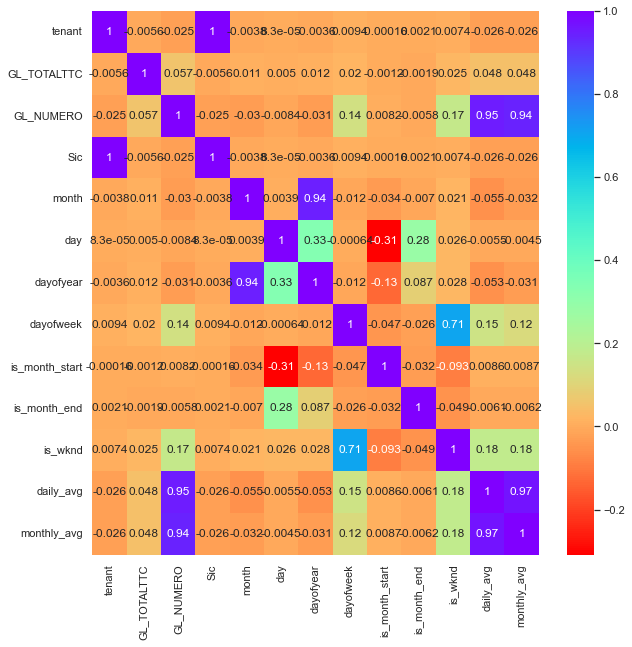

In [23]:
plt.figure(figsize=(10,10)) 
sns.heatmap(df_total.corr(),annot=True,cmap="rainbow_r")

In [24]:
Dec['id'] = pd.factorize(Dec['tenant'])[0]

In [25]:
Dec = Dec[~Dec.index.duplicated()]

In [26]:
Dec = Dec.loc[:,~Dec.columns.duplicated()]

In [27]:
df_total = df_total.loc[:,~df_total.columns.duplicated()]

In [28]:
Dec

,tenant,ETABLISSEMENT,GL_TOTALTTC,GL_NUMERO,Sic,CODEISO2,TYPEETAB,month,day,dayofyear,dayofweek,is_month_start,is_month_end,is_wknd,daily_avg,monthly_avg,id
0,90001909,001,1830.53,60,90001909,FR,SUC,12,1,335,2,1,0,0.00,60.00,60.00,0
1,90001909,001,1502.24,61,90001909,FR,SUC,12,2,336,3,0,0,0.00,154.60,157.81,0
2,90001909,001,1497.99,60,90001909,FR,SUC,12,3,337,4,0,0,0.00,152.75,157.81,0
3,90001909,001,3975.18,149,90001909,FR,SUC,12,4,338,5,0,0,1.00,202.67,166.67,0
4,90001909,001,1765.42,99,90001909,FR,SUC,12,5,339,6,0,0,1.00,130.67,166.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100382,98684541,7998,2058.70,19,98684541,FR,SUC,12,29,363,2,0,0,0.00,17.75,15.14,195
100383,98684541,7998,1846.90,21,98684541,FR,SUC,12,30,364,3,0,0,0.00,15.60,15.14,195
100384,98684541,7998,1657.50,15,98684541,FR,SUC,12,31,365,4,0,1,0.00,15.00,15.00,195
100385,98684541,8949,729.34,5,98684541,FR,ECO,12,28,362,1,0,0,0.00,5.00,5.00,195


In [29]:
# Nettoyer les données et garder les features fortement corrélés
for df in [df_total, Dec]:
    df.drop([ 
                  #'GL_TOTALTTC',
        'ETABLISSEMENT',
                #  'month',
              #    'day',
       # 'is_month_start',
        #'is_month_end',             
        'CODEISO2',
        'TYPEETAB',
        'tenant',
        'Sic',
                  #'dayofyear',
    ],
                 axis=1, 
                 inplace=True)

In [30]:
df_total.to_csv('df_total.csv')

In [34]:
model = xgb.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

In [35]:
every_column_except_y= [col for col in df_total.columns if col not in ['GL_NUMERO']]
model.fit(df_total[every_column_except_y],df_total['GL_NUMERO'])

C:\Users\farah\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:26:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=8,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=123, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=123, subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

<AxesSubplot:>

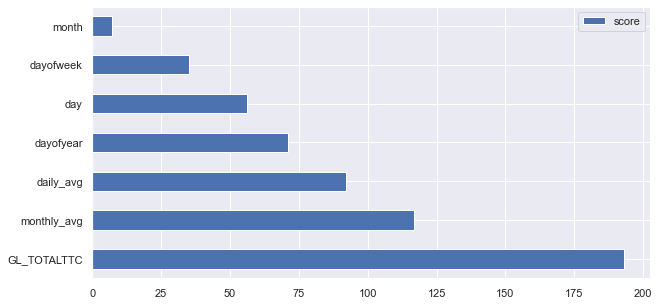

In [36]:
feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (10,5)) 

In [39]:
Dec.drop(columns=["id"],inplace=True)

In [40]:
#Y_train = df_total['GL_NUMERO']
#X_train = df_total.drop('GL_NUMERO', axis=1)
X_test = Dec.drop('GL_NUMERO', axis=1)

In [41]:
test_preds = model.predict(X_test)

C:\Users\farah\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [42]:
test_preds

array([ 65.78201 , 102.028   ,  99.196625, ...,  15.834746,   4.812145,
         4.812145], dtype=float32)

In [43]:
Dec['pred'] = test_preds

In [44]:
Dec

,GL_TOTALTTC,GL_NUMERO,month,day,dayofyear,dayofweek,is_month_start,is_month_end,is_wknd,daily_avg,monthly_avg,pred
0,1830.53,60,12,1,335,2,1,0,0.00,60.00,60.00,65.78
1,1502.24,61,12,2,336,3,0,0,0.00,154.60,157.81,102.03
2,1497.99,60,12,3,337,4,0,0,0.00,152.75,157.81,99.20
3,3975.18,149,12,4,338,5,0,0,1.00,202.67,166.67,193.88
4,1765.42,99,12,5,339,6,0,0,1.00,130.67,166.67,113.47
...,...,...,...,...,...,...,...,...,...,...,...,...
100382,2058.70,19,12,29,363,2,0,0,0.00,17.75,15.14,18.15
100383,1846.90,21,12,30,364,3,0,0,0.00,15.60,15.14,16.32
100384,1657.50,15,12,31,365,4,0,1,0.00,15.00,15.00,15.83
100385,729.34,5,12,28,362,1,0,0,0.00,5.00,5.00,4.81


In [45]:
Dec = Dec.reindex(columns=['GL_TOTALTTC','month','day','dayofyear','dayofweek','is_month_start','is_month_end','is_wknd','daily_avg','montly_avg','rolling_mean10','GL_NUMERO','pred'])

In [46]:
Dec

,GL_TOTALTTC,month,day,dayofyear,dayofweek,is_month_start,is_month_end,is_wknd,daily_avg,montly_avg,rolling_mean10,GL_NUMERO,pred
0,1830.53,12,1,335,2,1,0,0.00,60.00,NaN,NaN,60,65.78
1,1502.24,12,2,336,3,0,0,0.00,154.60,NaN,NaN,61,102.03
2,1497.99,12,3,337,4,0,0,0.00,152.75,NaN,NaN,60,99.20
3,3975.18,12,4,338,5,0,0,1.00,202.67,NaN,NaN,149,193.88
4,1765.42,12,5,339,6,0,0,1.00,130.67,NaN,NaN,99,113.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100382,2058.70,12,29,363,2,0,0,0.00,17.75,NaN,NaN,19,18.15
100383,1846.90,12,30,364,3,0,0,0.00,15.60,NaN,NaN,21,16.32
100384,1657.50,12,31,365,4,0,1,0.00,15.00,NaN,NaN,15,15.83
100385,729.34,12,28,362,1,0,0,0.00,5.00,NaN,NaN,5,4.81


In [47]:
r = r2_score(Dec['pred'], Dec['GL_NUMERO']) 

In [48]:
r

0.8501329176983599

In [47]:
df_total

,GL_TOTALTTC,GL_NUMERO,month,day,dayofyear,dayofweek,is_month_start,is_month_end,is_wknd,daily_avg,monthly_avg
0,3511.72,141,9,1,244,2,1,0,0.00,141.00,141.00
1,2230.77,110,9,2,245,3,0,0,0.00,81.64,82.17
2,2635.27,124,9,3,246,4,0,0,0.00,88.64,82.17
3,1776.33,85,9,4,247,5,0,0,1.00,118.18,95.33
4,703.39,39,9,6,249,0,0,0,0.00,53.11,82.17
...,...,...,...,...,...,...,...,...,...,...,...
283741,3136.10,28,11,26,330,4,0,0,0.00,14.00,9.95
283742,2232.60,17,11,27,331,5,0,0,1.00,22.08,18.25
283743,2495.80,19,11,29,333,0,0,0,0.00,8.17,9.95
283744,692.00,6,11,30,334,1,0,1,0.00,6.00,6.00


In [ ]:
Dec.to_csv('Decembre_tested.csv')

In [ ]:
Dec.to_csv('Prediction_Decembre.csv')